# Part I - Telecom Customer Churn Data Exploration

## Chisom Promise Nnamani

This dataset is the customer information of a telecommunication company. it contains information about 3333 of its customers with 11 features or attributes related to the services of the company.

This dataset was sourced from Kaggle and can be obtained via this [link](https://www.kaggle.com/datasets/barun2104/telecom-churn).

This possible insights I intend to gain from wrangling, analyzing and visualizing this dataset are:

  1. What features contribute more to customer churn?
 
 
 2. Who are the customers more likely to churn?
 

 3. What actions can be taken to stop them from leaving?

## Preliminary Wrangling

## Assessing the Telecom Customer Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
customer_data = pd.read_csv('telecom_churn.csv')

# display five columns of our dataset in a dataframe
customer_data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### Column Description:

Each row represents a customer and each column contains attributes related to customer as described in the column description.

The “Churn” column is our target variable.

 - **Churn:** 1 if customer cancelled service, 0 if not
 
 
 - **AccountWeeks:** number of weeks customer has had active account
 
 
 - **ContractRenewal:** 1 if customer recently renewed contract, 0 if not
 
 
 - **DataPlan:** 1 if customer has data plan, 0 if not
 

 - **DataUsage:** gigabytes of monthly data usage
 

 - **CustServCalls:** number of calls into customer service
 

 - **DayMins:** average daytime minutes per month
 

 - **DayCalls:** average number of daytime calls
 

 - **MonthlyCharge:** average monthly bill
 

 - **OverageFee:** largest overage fee in last 12 months
 

 - **RoamMins:** average number of roaming minutes

In [3]:
# Checking the number or the rows and columns in our dataframe
customer_data.shape

(3333, 11)

In [4]:
# Checking the information in our data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
customer_data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

We do not have any missing values in our dataset.

In [6]:
# sometimes, empty value are represented with "None"
# using "apply" to search for "None" in all dataframe columns

substring = 'none'
customer_data[customer_data.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(),
                                  axis=1)]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins


So there are really no column with missing values

In [7]:
# Checking for duplicate rows
customer_data.duplicated().any()

False

We do not have any duplicate rows in our dataframe

In [8]:
# Checking the summary of our numerical columns
customer_data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


### Issues

 - columns names are not fit for programming
    
 - the values used to represent Churn, Customer Renewal and Data Plan columns aren't definning enough

## Cleaning the Telecom Company Data

In [9]:
# making copy of original data
customer_info = customer_data.copy()

### Issue

columns names are not fit for programming

### Define

Seperate the column labels that are made up two words with an underscore.

Change the name of the column labels to lower case

### Code

In [10]:
# Seperate the column labels that are made up two words with a hyphen
customer_info.rename(columns={'AccountWeeks': 'Account_Weeks', 'ContractRenewal': 'Contract_Renewal',
                              'DataPlan': 'Data_Plan', 'DataUsage': 'Data_Usage',
                              'CustServCalls': 'Customer_Service_Calls', 'DayMins': 'Day_Minutes', 'DayCalls': 'Day_Calls',
                              'MonthlyCharge': 'Monthly_Charge', 'OverageFee': 'Overage_Fee', 'RoamMins': 'Roam_Minutes'}, inplace = True)

# change the name of the column labels to lower case
customer_info.rename(columns=lambda x: x.lower(), inplace=True)

### Test

In [11]:
customer_info.head()

,churn,account_weeks,contract_renewal,data_plan,data_usage,customer_service_calls,day_minutes,day_calls,monthly_charge,overage_fee,roam_minutes
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### Issue

The values used to represent churn, customer renewal and data plan columns aren't definning enough

### Define

Replace the 1 and 0 values in churn, customer_renewal, and data_plan columns with unique values that do convey their meanings.

### Code

In [12]:
# change the value of the churn, contract_renewal, and data_plan for easy manipulation
customer_info['churn'] = np.where(customer_info['churn'] == 1, 'Left', 'Stayed')
customer_info['contract_renewal'] = np.where(customer_info['contract_renewal'] == 1, 'Renewed', 'Not Renewed')
customer_info['data_plan'] = np.where(customer_info['data_plan'] == 1, 'Yes', 'No')

### Test

In [13]:
customer_info.head()

,churn,account_weeks,contract_renewal,data_plan,data_usage,customer_service_calls,day_minutes,day_calls,monthly_charge,overage_fee,roam_minutes
0,Stayed,128,Renewed,Yes,2.7,1,265.1,110,89.0,9.87,10.0
1,Stayed,107,Renewed,Yes,3.7,1,161.6,123,82.0,9.78,13.7
2,Stayed,137,Renewed,No,0.0,0,243.4,114,52.0,6.06,12.2
3,Stayed,84,Not Renewed,No,0.0,2,299.4,71,57.0,3.10,6.6
4,Stayed,75,Not Renewed,No,0.0,3,166.7,113,41.0,7.42,10.1


In [14]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   churn                   3333 non-null   object 
 1   account_weeks           3333 non-null   int64  
 2   contract_renewal        3333 non-null   object 
 3   data_plan               3333 non-null   object 
 4   data_usage              3333 non-null   float64
 5   customer_service_calls  3333 non-null   int64  
 6   day_minutes             3333 non-null   float64
 7   day_calls               3333 non-null   int64  
 8   monthly_charge          3333 non-null   float64
 9   overage_fee             3333 non-null   float64
 10  roam_minutes            3333 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 286.6+ KB


The churn, contract_renewal, and data_plan columns are now in object data type. Let's convert them to Categorical data type.

In [15]:
# change churn, customer_renewal, and data__plan values into category data type
cat_col = ['churn', 'contract_renewal', 'data_plan']
customer_info[cat_col] = customer_info[cat_col].astype('category')

In [16]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   churn                   3333 non-null   category
 1   account_weeks           3333 non-null   int64   
 2   contract_renewal        3333 non-null   category
 3   data_plan               3333 non-null   category
 4   data_usage              3333 non-null   float64 
 5   customer_service_calls  3333 non-null   int64   
 6   day_minutes             3333 non-null   float64 
 7   day_calls               3333 non-null   int64   
 8   monthly_charge          3333 non-null   float64 
 9   overage_fee             3333 non-null   float64 
 10  roam_minutes            3333 non-null   float64 
dtypes: category(3), float64(5), int64(3)
memory usage: 218.6 KB


### What is the structure of your dataset?

There are **3333 rows** representing each customer, with **11** features or variables.

8 of the features which include (account_weeks, data_usage, customer_service_calls, day_mins, day_calls, monthly_charge, overage_fee. roam_mins) are numerical data types, while the other 3 which are (churn, contract_renewal, and data plan) are in categorical data type.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the customer churn in the dataset. i.e how each of the other features determines if the will stay or leave the telecom company.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that Data plan and Monthly charges will have the strongest effect on customer churn: the more data plans suscribed, the more likely the customer will stay with the Telecom company. Also if the monthly charges aren't to high, the customers are more likely to stay with the company.

I also think that other variables like Contract Renewal, Data Usage, Customer Service Calls, Day Minutes, and Roam Minutes will also have effect on retention or losing of the customers.

## Univariate Analysis

**A: For Categorical Variable**

**I will start looking at the main variable of interest - Churn, followed by Contract renewal and Data plan**

In [17]:
# creating a function to create a countplot into a subplot for a given category variable

color = sns.color_palette()[0]
def count_plot(cat):
    if cat == 'churn':
        sns.countplot(data=customer_info, x = cat, color=color)
        plt.xlabel('Churn')
        plt.ylabel('Count')
        plt.title('Churn Distribution')
    elif cat == 'contract_renewal':
        sns.countplot(data = customer_info, x  = cat, color=color)
        plt.xlabel('Contract Renewal');
        plt.ylabel('Count')
        plt.title('Contract Renewal Distribution')
    else:
        sns.countplot(data = customer_info, x = cat, color=color)
        plt.xlabel('Data Plan');
        plt.ylabel('Count')
        plt.title('Data Plan Distribution')

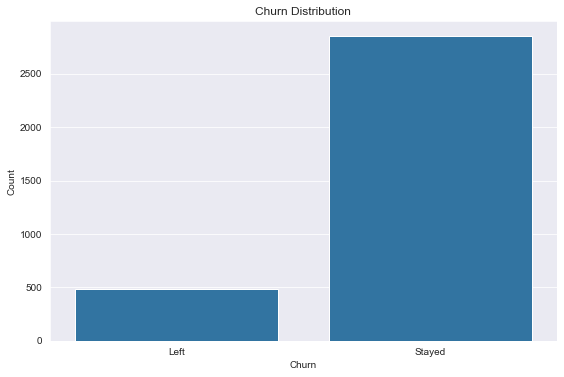

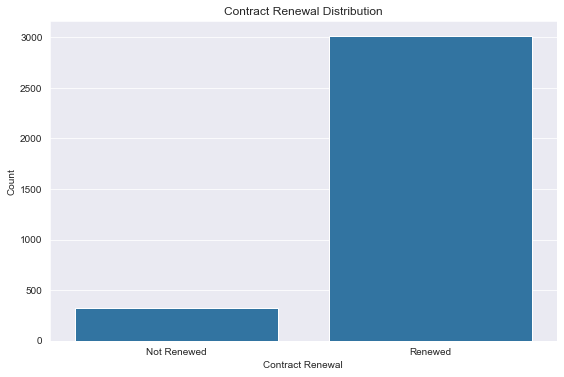

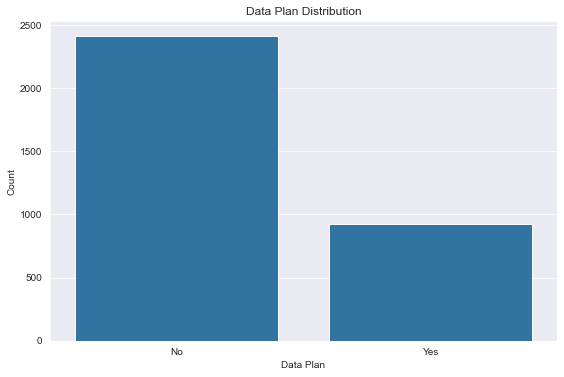

In [18]:
# iterataing through a list of categorical variabale for plotting.

cat_list = ['churn', 'contract_renewal', 'data_plan']
for cat_name in cat_list:
    plt.figure(figsize=(20, 20))
    sns.set_style('darkgrid')
    plt.subplot(3, 2, 1)
    count_plot(cat_name)

Let's supplement the graphical charts of the categorical variables with descriptive statistics to ensure we arrive at the right conclusion.

***For the 'Churn' variable: How high is the proprotion of customers which cancelled the service?***

In [19]:
# let's get the value count of each churn value in a data frame
print(pd.DataFrame(customer_info['churn'].value_counts()))

# let's get the percentage of each churn value count
print(pd.DataFrame(customer_info['churn'].value_counts(normalize=True)*100))

        churn
Stayed   2850
Left      483
            churn
Stayed  85.508551
Left    14.491449


From the chart and the descriptive statistics of the "Churn" column above, we can see that **483(14.4%) customers were lost** by the telecom company, and **more than 2500(85.5%) were retained by the company**. 483 might seem a small number but that number could have fetch good profit for the Telecom company.

***For the 'Contract Renewal' variable: How many customers recently renewed their contract?***

In [20]:
# let's get the value count of each contract renewal value in a data frame
print(pd.DataFrame(customer_info['contract_renewal'].value_counts()))

# let's get the percentage of each contract renewal value count
print(pd.DataFrame(customer_info['contract_renewal'].value_counts(normalize=True)*100))

             contract_renewal
Renewed                  3010
Not Renewed               323
             contract_renewal
Renewed             90.309031
Not Renewed          9.690969


From the chart and the descriptive statistics of the "Contract Renewal" column above, we can see that **323(9.7%) customers did not renew their contract**, and **3010(90%) recently renewed their contract**. 

***For the 'Data Plan' variable: How many customers had data plan and how many did not?***

In [21]:
# let's get the value count of each data plan value in a data frame
print(pd.DataFrame(customer_info['data_plan'].value_counts()))

# let's get the percentage of each contract renewal value count
print(pd.DataFrame(customer_info['data_plan'].value_counts(normalize=True)*100))

     data_plan
No        2411
Yes        922
     data_plan
No   72.337234
Yes  27.662766


From the chart above, with the this descriptive statistics of the data plan column, we can see that only **922(27.6%) of the customers have** data plan while **2411(72%) of the customers do not** have data plan. 

**B: For Numeric Variables**

In [22]:
# Plottting the histograms of the numerical variables or columns using subplot

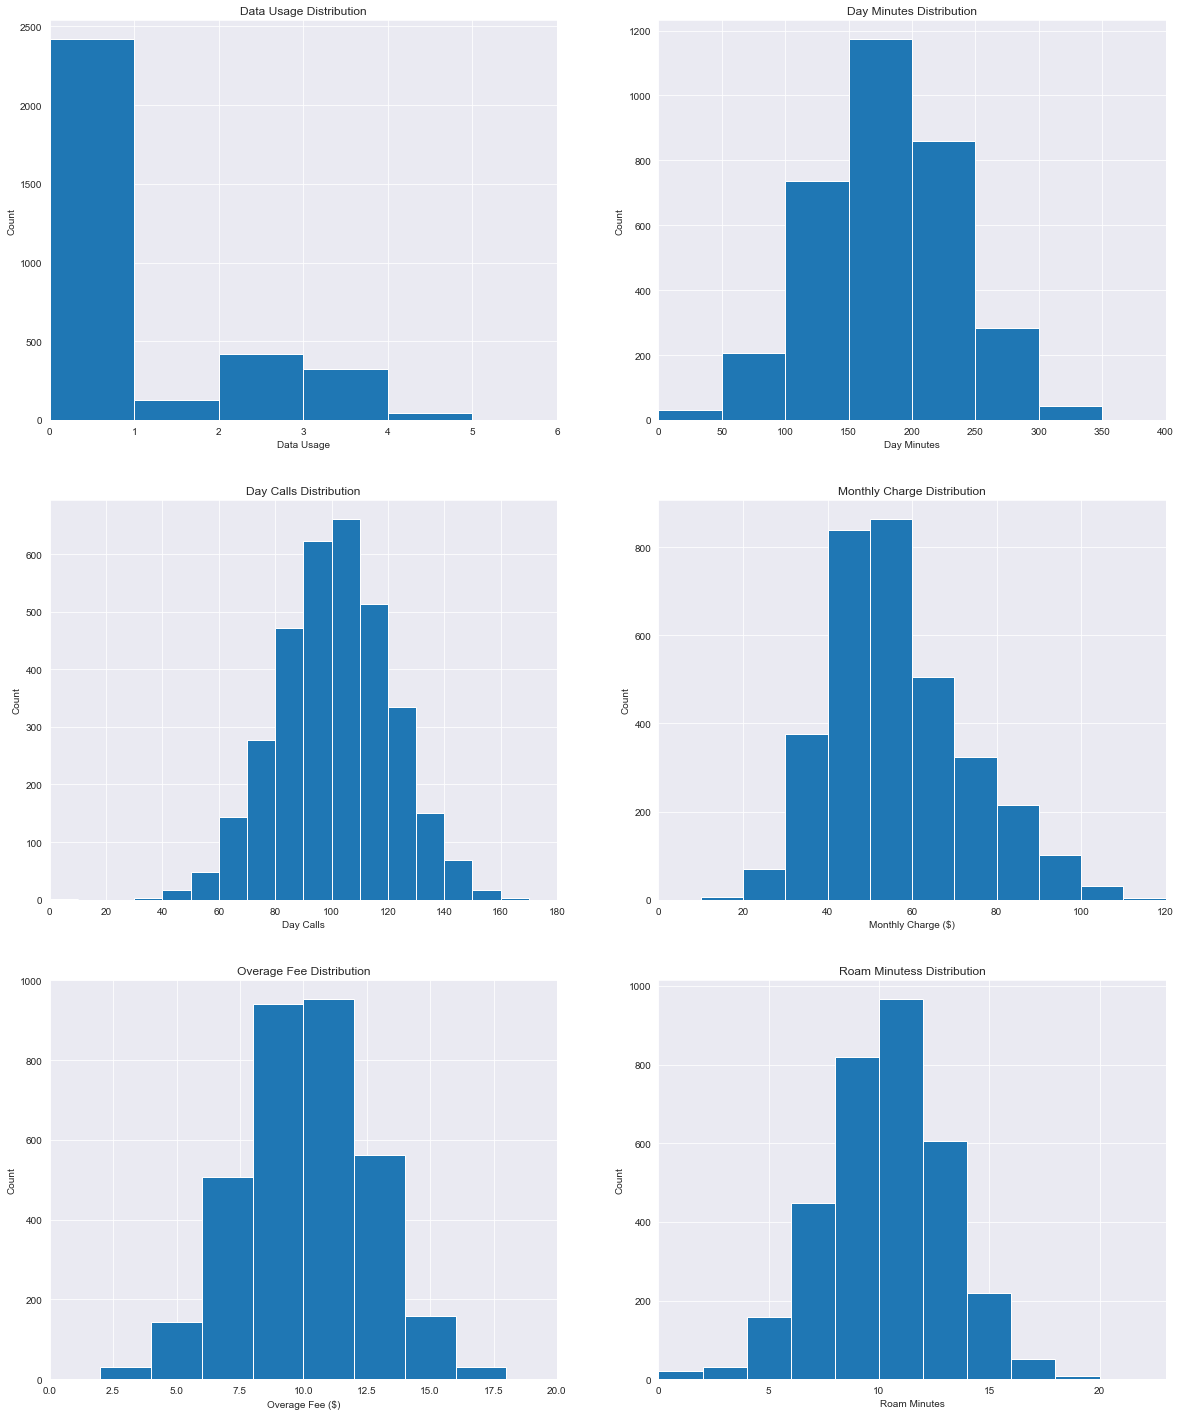

In [23]:
# set a figure size for the subplots
plt.figure(figsize= [20, 25])

# histograms on left
plt.subplot(3,2,1)
bins = np.arange(0, customer_info['data_usage'].max()+1, 1);
plt.hist(data=customer_info, x='data_usage', bins = bins);
plt.xlim(0, 6);
plt.title('Data Usage Distribution')
plt.xlabel('Data Usage')
plt.ylabel('Count')

plt.subplot(3,2,2)
bins = np.arange(0, customer_info['day_minutes'].max()+50, 50);
plt.hist(data=customer_info, x='day_minutes', bins = bins);
plt.xlim(0, 400);
plt.title('Day Minutes Distribution')
plt.xlabel('Day Minutes')
plt.ylabel('Count')

plt.subplot(3,2,3)
bins = np.arange(0, customer_info['day_calls'].max()+10, 10);
plt.hist(data=customer_info, x='day_calls', bins = bins);
plt.xlim(0, 180);
plt.title('Day Calls Distribution')
plt.xlabel('Day Calls')
plt.ylabel('Count')

plt.subplot(3,2,4)
bins = np.arange(10, customer_info['monthly_charge'].max()+10, 10);
plt.hist(data=customer_info, x='monthly_charge', bins = bins);
plt.xlim(0, 120);
plt.title('Monthly Charge Distribution')
plt.xlabel('Monthly Charge ($)')
plt.ylabel('Count')

plt.subplot(3,2,5)
bins = np.arange(0, customer_info['overage_fee'].max()+2, 2);
plt.hist(data=customer_info, x='overage_fee', bins = bins);
plt.xlim(0, 20);
plt.title('Overage Fee Distribution')
plt.xlabel('Overage Fee ($)')
plt.ylabel('Count')

plt.subplot(3,2,6) 
bins = np.arange(0, customer_info['roam_minutes'].max()+2, 2);
plt.hist(data=customer_info, x='roam_minutes', bins = bins);
plt.xlim(0, 23);
plt.title('Roam Minutess Distribution')
plt.xlabel('Roam Minutes')
plt.ylabel('Count');

**Let's look into what's going on in the histogram plots of the various variables**

**For the data usage hist plot:** This is the gigabytes of monthly data usage. The plot is skewed to the right, with the highest data usage value being **0**. This means that about **2500** customers did not subscribe or use any data monthly. 

**For the day mins hist plot:** This is the average daytime minutes per month. There is a normal distribution in the plot which shows that most of the customers, about 1200 spend at most **150 to 200 minutes** per day.

**For day calls hist plot:** This is the average number of calls per day. From the plot, we could see that on average, more than **600** of its customers make the average of **90 to 110 calls** per day, which is the highest average number of calls, while the least amount of calls is 0 t0 30.

**For monthly charge hist plot:** This is the average monthly bill by the company. The plot is slightly skewed to the right, with most of its customers (more than 800) being charges **40 to 60 dollars** monthly.

**For the overage fee hist plot:** Overage fee is the fee for the extra minutes. The plot shows a normal distribution with the peak at the center and most of the customers being charged about **7.5 to 12.5 dollars**.

**For the Roam minutes hist plot:** The plot is skewed to the left with with about 1000 of its customers spending about 9 to 12 minutes in roam minutes.

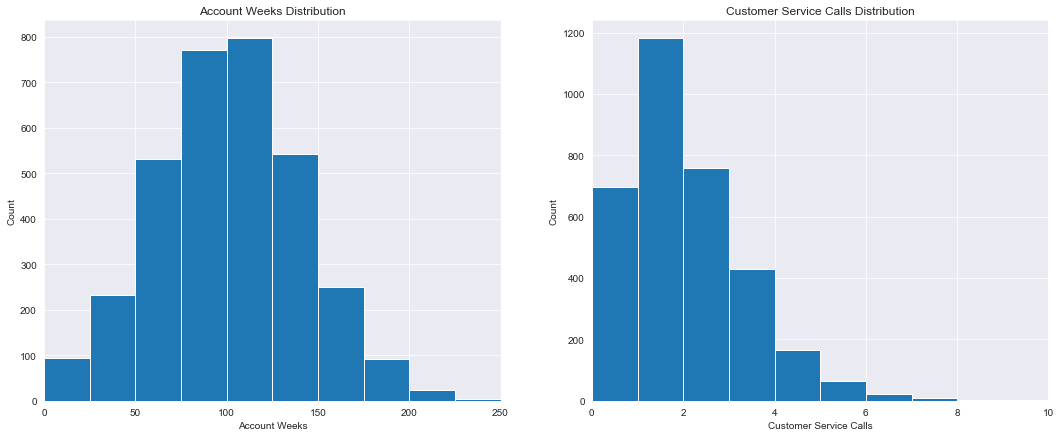

In [24]:
plt.figure(figsize = [18, 7])

plt.subplot(1, 2, 1)
bins = np.arange(0, customer_info['account_weeks'].max()+25, 25);
plt.hist(data=customer_info, x='account_weeks', bins = bins);
plt.xlim(0, 250);
plt.title('Account Weeks Distribution')
plt.xlabel('Account Weeks')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
bins = np.arange(0, customer_info['customer_service_calls'].max()+1.1, 1);
plt.hist(data=customer_info, x='customer_service_calls', bins = bins);
plt.xlim(0, 10);
plt.title('Customer Service Calls Distribution')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count');

**For the account weeks hist plot:** The plot is slightly skewd, almost normal, with about 800 of its customer having active account weeks for about 75 to 125 weeks, which is are the number of weeks that occured most.

**For the customer service calls plot:** For the customer service calls plot: The plot is skewed to the right, with about 1200 customers making up to 2 customer service calls per day.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the chart and the descriptive statistics of the "Churn" column above, we can see that **483(14.4%) customers were lost** by the telecom company, and **more than 2500(85.5%)** were retained by the company.

The price variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between  500𝑎𝑛𝑑 1000, and another just below $5000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When looking at the data usage, I noticed that the the plot  is slightly skewed to the righ, having more values on the lower end which is 0. I also noticed that the plot also correlates with the data plan plot, because most of the customers had no data plan. Who knows if these two have a strong correlation? We will see...

## Bivariate Analysis

**A: For Categorical Variables**

In this section, I will investigate relationships between pairs of variables in the data. I will start by plotting the relationship between categorical variables in the data. then move on to numeric variables.

In [25]:
# creating a function that plots a heatmap for two categorical variables
def heat_map(cat_1, cat_2):
    plt.figure(figsize = (8,7))
    # Use group_by() and size() to get number of values in each category
    ct_counts = customer_info.groupby([cat_1, cat_2]).size()

    # Use series.reset_index() to convert a series into a dataframe object
    ct_counts = ct_counts.reset_index(name='count')

    # Use DataFrame.pivot() to rearrange the data, to have data plan values on rows
    ct_counts = ct_counts.pivot(index = cat_1, columns = cat_2, values = 'count')
    
    # plot the heatmap
    sns.heatmap(ct_counts, annot = True, fmt = '.1f', cmap = 'viridis_r');
    plt.title('Heat map {} vs {}'.format(cat_2.capitalize(), cat_1.capitalize()));
    plt.ylabel('{}'.format(cat_1.replace('_', ' ').capitalize()));
    plt.xlabel('{}'.format(cat_2.replace('_', ' ').capitalize()));

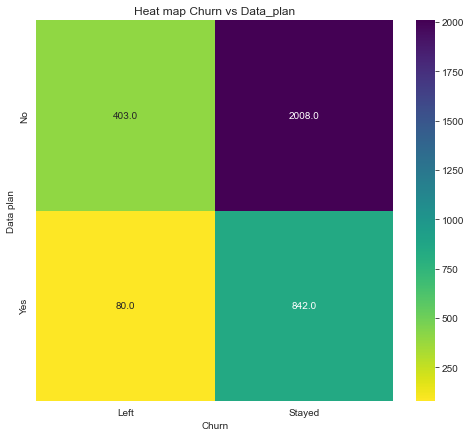

In [26]:
heat_map('data_plan', 'churn')

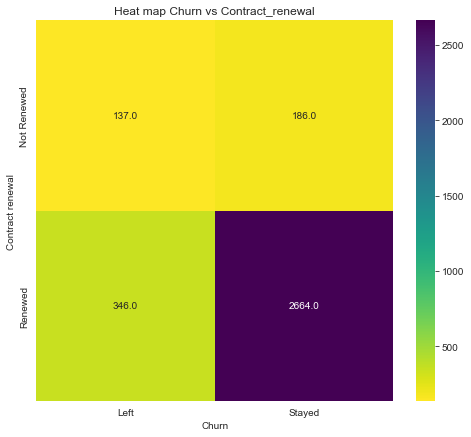

In [27]:
heat_map('contract_renewal', 'churn')

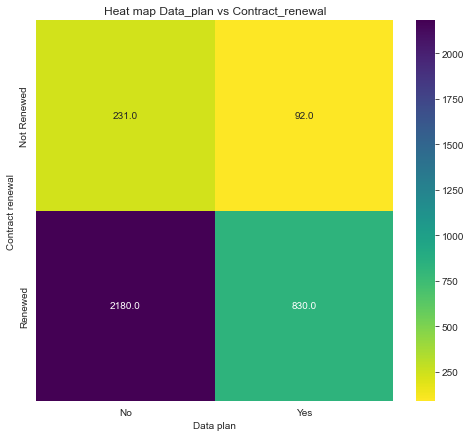

In [28]:
heat_map('contract_renewal', 'data_plan')

**Let's get the descriptive statistics to back up our categorical heat map plots above.**

In [29]:
# let's use groupby to compare data plan and churn value counts
print(pd.DataFrame(customer_info.groupby('data_plan')['churn'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('data_plan')['churn'].value_counts(normalize=True)*100))

                  churn
data_plan              
No        Stayed   2008
          Left      403
Yes       Stayed    842
          Left       80
                      churn
data_plan                  
No        Stayed  83.284944
          Left    16.715056
Yes       Stayed  91.323210
          Left     8.676790


Interesting insight! From our descriptive statistics which backs up our heatmaps plot, we could see that about **80(8.5%)** of the customers who had data plans were still lost by the company. But a higher percentage of **403(16.7%**) who did not have data plan were lost by the company. This graph and stattistics showed us that no data plan leads to customer churn.

And looking at the number of people who had no data plan but still stayed, about **2008(83%)** of them. That's a lot of profit waiting to be harnessed if we could convince these customers to buy data plans from the company.

In [30]:
# let's use groupby to compare contract renewal and churn value counts
print(pd.DataFrame(customer_info.groupby('contract_renewal')['churn'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('contract_renewal')['churn'].value_counts(normalize=True)*100))

                         churn
contract_renewal              
Not Renewed      Stayed    186
                 Left      137
Renewed          Stayed   2664
                 Left      346
                             churn
contract_renewal                  
Not Renewed      Stayed  57.585139
                 Left    42.414861
Renewed          Stayed  88.504983
                 Left    11.495017


From this descriptive statistics, we can see that about **137(42%)** of the customers who did not recently renew their contract were lost by the company, while only about **346(11%)** of the customers who recently renewed their contract were lost by the company.

In [31]:
# let's use groupby to compare contract renewal and data plan value counts
print(pd.DataFrame(customer_info.groupby('contract_renewal')['data_plan'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('contract_renewal')['data_plan'].value_counts(normalize=True)*100))

                      data_plan
contract_renewal               
Not Renewed      No         231
                 Yes         92
Renewed          No        2180
                 Yes        830
                      data_plan
contract_renewal               
Not Renewed      No   71.517028
                 Yes  28.482972
Renewed          No   72.425249
                 Yes  27.574751


Okay! This is becoming interesting. From our descriptive statistics, we could see that **231(72%)** of the customers who did not renew their contract had no data plan, and almost same percentage about **2180(72%)** of the customers who renewed their contract but still had no data plan.

**B: For Numeric Variables**

In this section, I will investigate relationships between pairs of numeric variables in the data.

In [32]:
def Relationship(num_var1, num_var2):
    sns.set(rc={"figure.figsize":(7, 7)})
    sns.regplot(data=customer_info, x=num_var1, y=num_var2, x_jitter=0.3, fit_reg=False, scatter_kws={'alpha':0.3})
    plt.title('{}'. format(num_var1 + ' vs '+ num_var2))

    if num_var1 == 'data_usage':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ').capitalize()));
    elif num_var1 == 'account_weeks':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ').capitalize()));
    elif num_var1 == 'customer_service_calls':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ').capitalize()));
    elif  num_var1 == 'day_minutes':
        plt.xlabel('{} (mins)'.format(num_var1.replace('_', ' ').capitalize()));
    elif num_var1 == 'day_calls':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ').capitalize()));
    elif num_var1 == 'roam_minutes':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ').capitalize()));
    elif num_var1 == 'roam_miutes':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ').capitalize()));
    else:
        plt.xlabel('{} ($)'.format(num_var1.replace('_', ' ').capitalize()));

    if num_var2 == 'data_usage':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ').capitalize()))
    elif num_var1 == 'account_weeks':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ').capitalize()))
    elif num_var1 == 'customer_service_calls':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ').capitalize()))
    elif  num_var1 == 'day_minutes':
        plt.ylabel('{} (mins)'.format(num_var2.replace('_', ' ').capitalize()))
    elif num_var1 == 'day_calls':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ').capitalize()))
    elif num_var1 == 'roam_minutes':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ').capitalize()))
    elif num_var1 == 'monthly_charge':
        plt.ylabel('{} ($)'.format(num_var2.replace('_', ' ').capitalize()))
    else:
        plt.ylabel('{} ($)'.format(num_var2.replace('_', ' ').capitalize()))

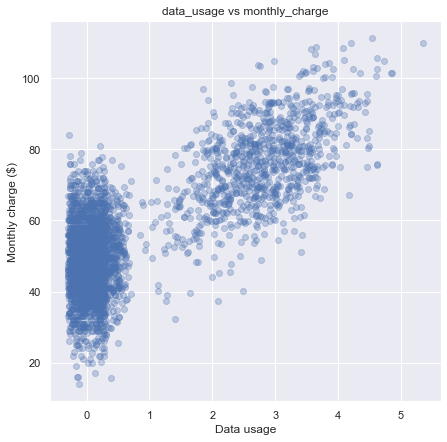

In [33]:
Relationship('data_usage', 'monthly_charge')

The plot shows a positive relationship between data usage and monthly charge, but still on the plot, we also notice that most of the customers who had 0 data usage were still charged high.

What could have caused this? Were they roaming freely? Let's see the next plot.

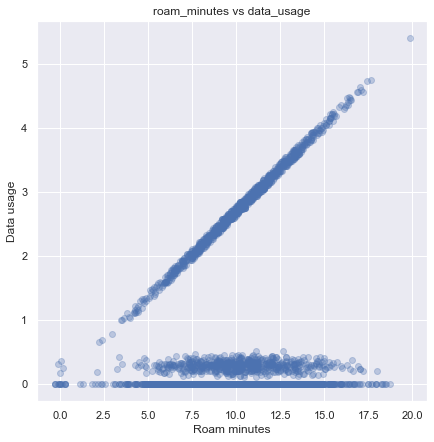

In [34]:
Relationship('roam_minutes', 'data_usage')

Here we could see that data usage only slightly correlates with roam minutes. The majority of the data points are located at 0 data usage. This means most of the customers had high roam minutes when they had no data.

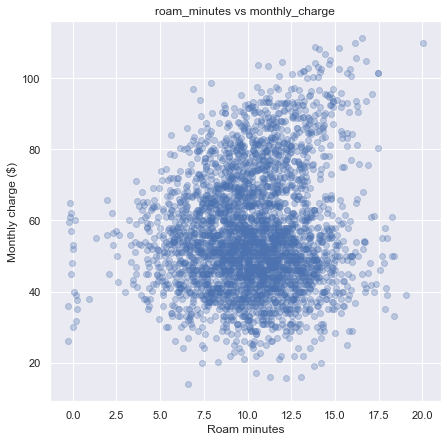

In [35]:
Relationship('roam_minutes', 'monthly_charge')
plt.ylabel('Monthly charge ($)');

That's why there's only a slight correlation between roam minutes and monthly charge. Remember, they roam when they have no data, and if they have no data, there is no data usage so it leads to little monthly charge.

Text(0, 0.5, 'Monthly charge ($)')

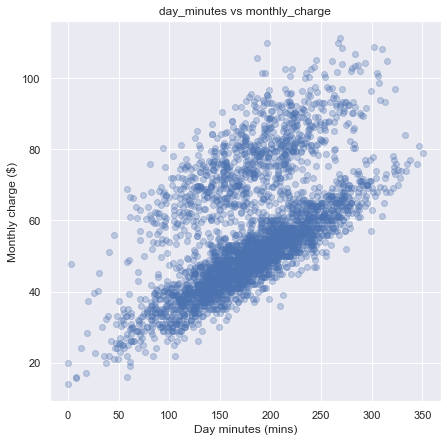

In [36]:
Relationship('day_minutes', 'monthly_charge')
plt.ylabel('Monthly charge ($)')

There is a high positive correlation between average day minutes and monthly charge. As average day mins increases, the monthly charge increases.

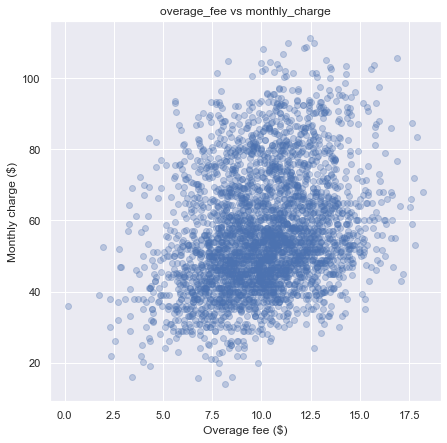

In [37]:
Relationship('overage_fee', 'monthly_charge')

This means that increase in overage fee slightly correlates with increase in monthly charge. 

**Let's use a heatmap to visualize all the numeric variables together.**

In [38]:
numeric_vars = ['account_weeks', 'data_usage','customer_service_calls', 'day_minutes', 'day_calls', 'monthly_charge',
       'overage_fee', 'roam_minutes']

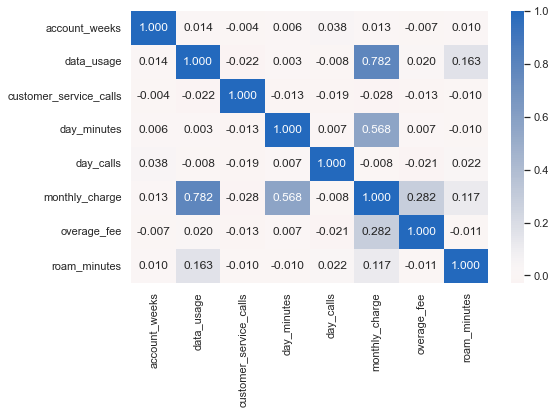

In [39]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(customer_info[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

**Let's also use a plot matrix to display the relationship between all the numerical variables.**

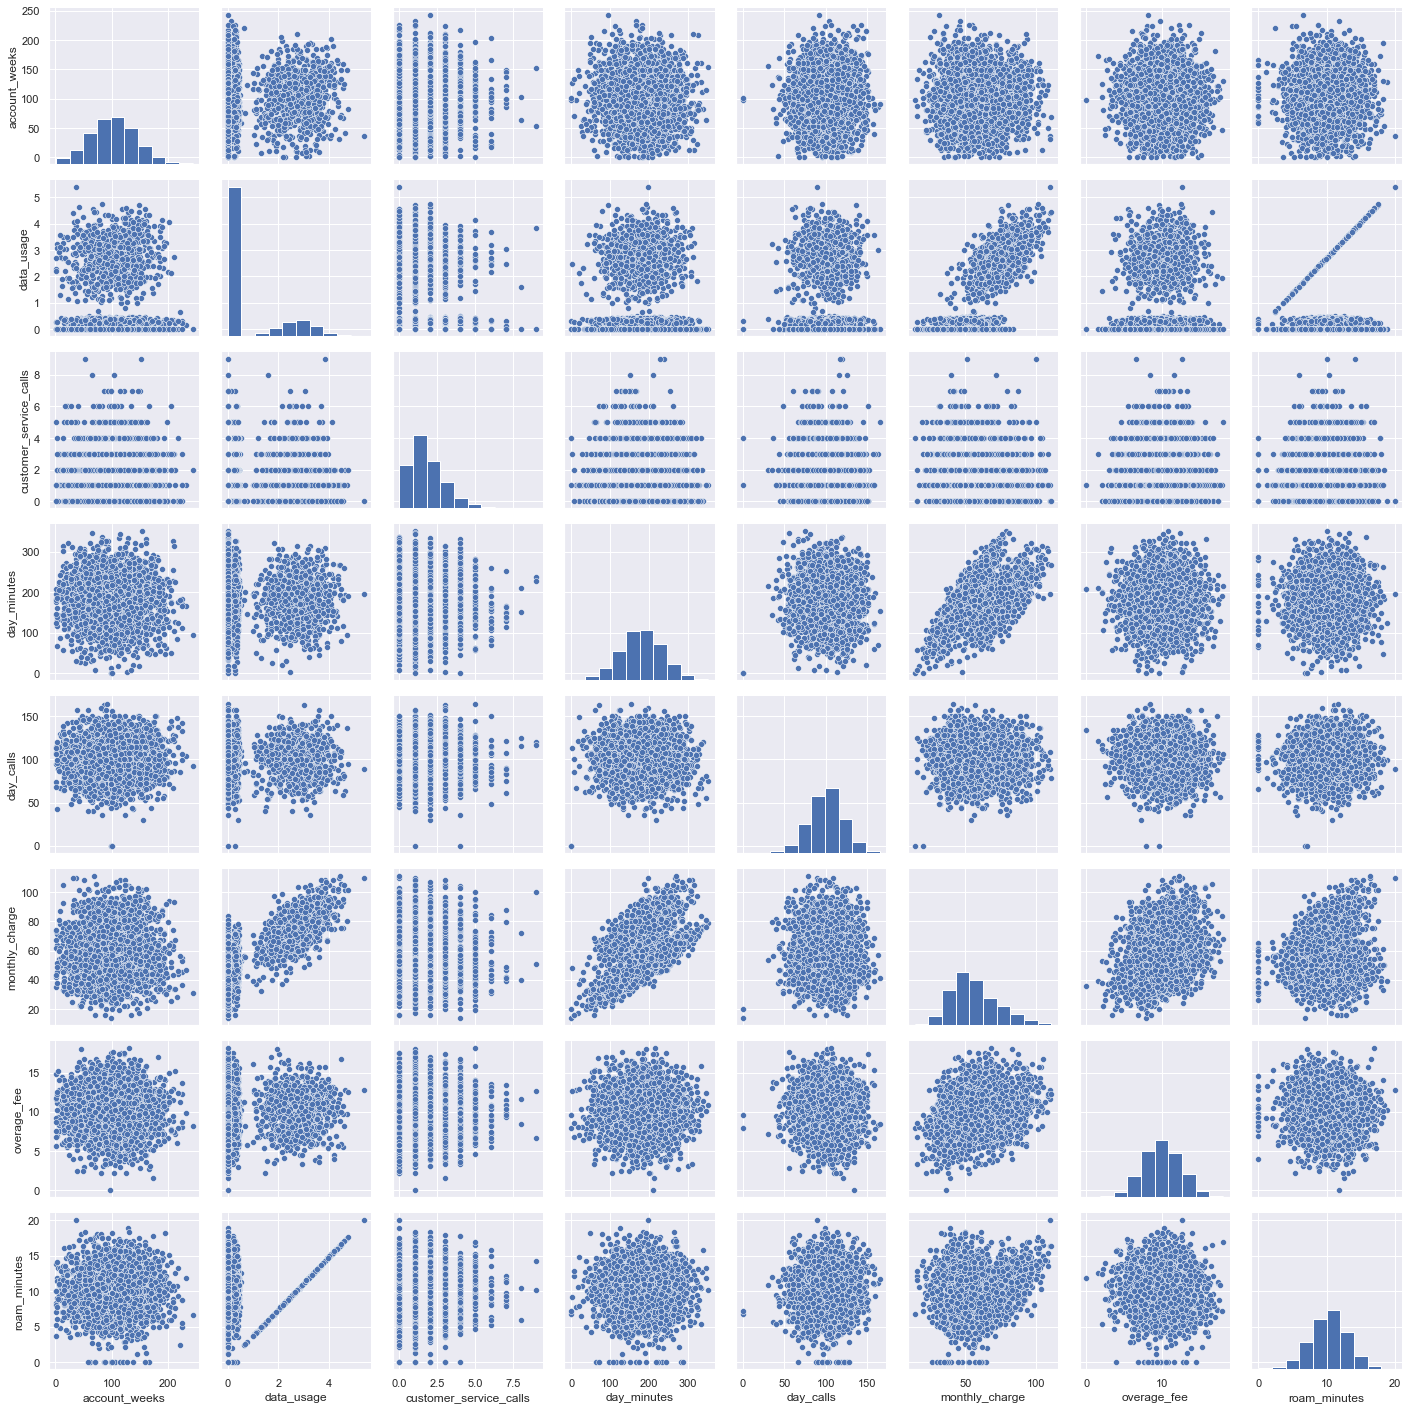

In [40]:
num_variables = ['account_weeks', 'data_usage', 'customer_service_calls', 'day_minutes', 'day_calls', 'monthly_charge',
                 'overage_fee', 'roam_minutes']

g = sns.PairGrid(data=customer_info, vars=num_variables)
g = g.map_offdiag(sns.scatterplot)
g.map_diag(plt.hist);

 We have seen that there is a strong correlation between data usage and monthly charge. There is also a strong correlation between data usage and and average day time miuntes per month.
 
Then as explained above, we can see clearly the very sligh correlation between monthly charge and roam mins.

**C: Between Numeric and Categorical Variables**

In this section, I will investigate relationships between numeric and categorical variables in the data.

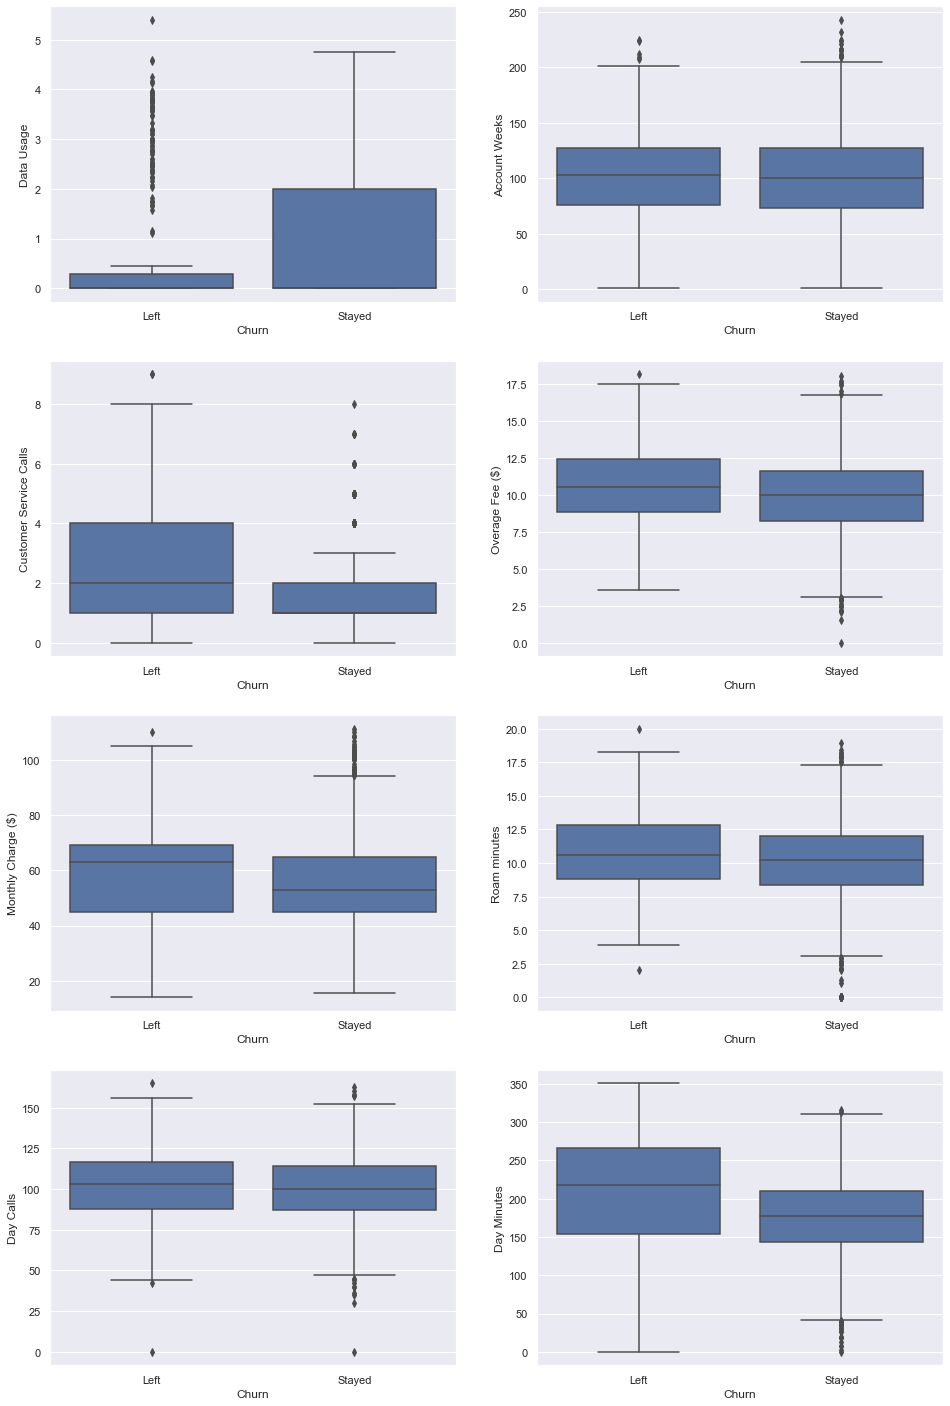

In [41]:
# Let's check the relationship between our target variable 'Churn' and other numeric variables
plt.figure(figsize=[16, 25])
base_color = sns.color_palette()[0]

plt.subplot(4, 2, 1)
sns.boxplot(data=customer_info, x='churn', y='data_usage', color=base_color)
plt.xticks(rotation=0);
plt.xlabel('Churn')
plt.ylabel('Data Usage')

plt.subplot(4, 2, 2)
sns.boxplot(data=customer_info, x='churn', y='account_weeks', color=base_color)
plt.xticks(rotation=0);
plt.xlabel('Churn')
plt.ylabel('Account Weeks')

plt.subplot(4, 2, 3)
sns.boxplot(data=customer_info, x='churn', y='customer_service_calls', color=base_color)
plt.xticks(rotation=0);
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')

plt.subplot(4, 2, 4)
sns.boxplot(data=customer_info, x='churn', y='overage_fee', color=base_color)
plt.xticks(rotation=0);
plt.xlabel('Churn')
plt.ylabel('Overage Fee ($)')

plt.subplot(4, 2, 5)
sns.boxplot(data=customer_info, x='churn', y='monthly_charge', color=base_color)
plt.xticks(rotation=0);
plt.xlabel('Churn')
plt.ylabel('Monthly Charge ($)')

plt.subplot(4, 2, 6)
sns.boxplot(data=customer_info, x='churn', y='roam_minutes', color=base_color)
plt.xticks(rotation=0);
plt.xlabel('Churn')
plt.ylabel('Roam minutes')

plt.subplot(4, 2, 7)
sns.boxplot(data=customer_info, x='churn', y='day_calls', color=base_color)
plt.xticks(rotation=0);
plt.xlabel('Churn')
plt.ylabel('Day Calls')

plt.subplot(4, 2, 8)
sns.boxplot(data=customer_info, x='churn', y='day_minutes', color=base_color)
plt.xticks(rotation=0);
plt.xlabel('Churn')
plt.ylabel('Day Minutes');

Looking at our violin plots between our target variable 'churn' and other numeric variables:

**For churn and data usage:** We see both medians of the boxplots are at zero. If we go back to the data usage distribution, we could see that more than half of the customers weren't using any data.

So for the remaining number, the number of customers that use data and stayed with the company was higher than the number who left the company.

**For churn and account weeks:** The people who cancelled the company and the people who stayed had the same active number of weeks. There is no significan difference.

**For churn and customer service calls:** The customers who made more customer service calls left the company. Wha could have caused this?

**For churn and overage fees:** Those who were charged high overage fee (that is the fee charged when they exceed their data linit but still use data) were lost by the company.

**For churn and monthly charge:** The customers who were charged high monthly charges and left the company were higher than the number of customers who stayed.

**For churn and roam mins:** The roam minutes of those who cancelled the company services are only slightly higher than those who stayed with the company.

**For churn and days calls:** The is no significance difference between the people who cancelled and not cancelled, as they made almost the same number of calls per day.

**For churn and day mins:** The customers who had more average day time minutes per month cancelled the company, than those who had less. Could this be because higher daytime minutes per day resulted in higher monthly charges?

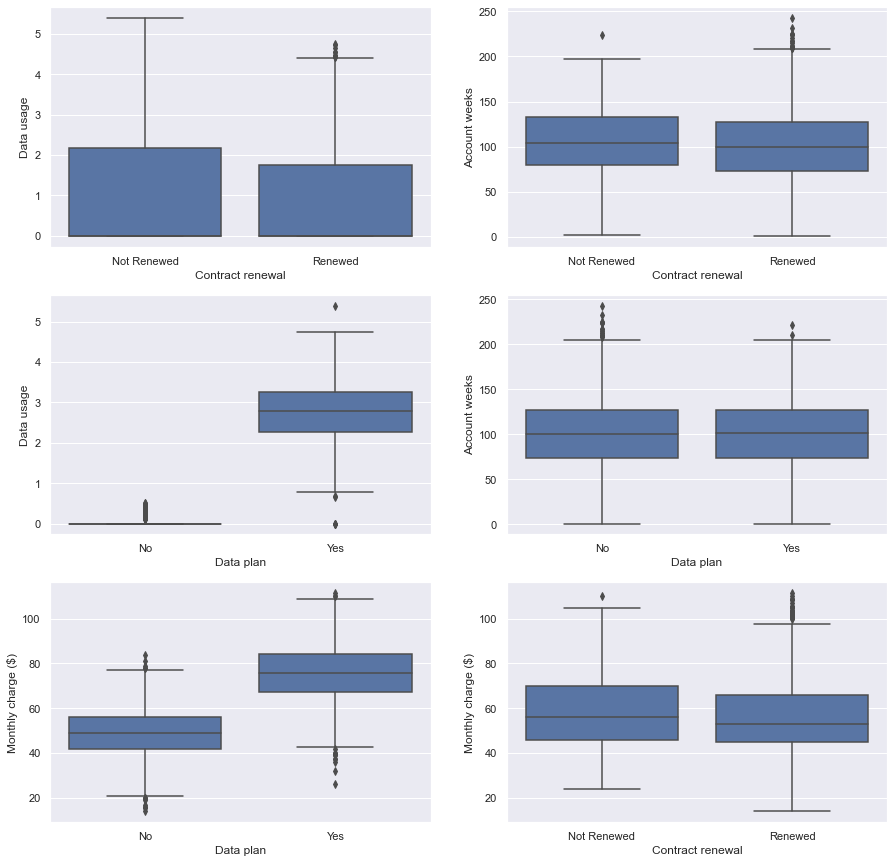

In [42]:
# Let's check the relationship between our target variable 'Churn' and other numeric variables
plt.figure(figsize=[15, 15])
base_color = sns.color_palette()[0]

plt.subplot(3, 2, 1)
sns.boxplot(data=customer_info, x='contract_renewal', y='data_usage', color=base_color)
plt.xticks(rotation=0)
plt.xlabel('Contract renewal')
plt.ylabel('Data usage');

plt.subplot(3, 2, 2)
sns.boxplot(data=customer_info, x='contract_renewal', y='account_weeks', color=base_color)
plt.xticks(rotation=0)
plt.xlabel('Contract renewal')
plt.ylabel('Account weeks');

plt.subplot(3, 2, 3)
sns.boxplot(data=customer_info, x='data_plan', y='data_usage', color=base_color)
plt.xticks(rotation=0)
plt.xlabel('Data plan')
plt.ylabel('Data usage');

plt.subplot(3, 2, 4)
sns.boxplot(data=customer_info, x='data_plan', y='account_weeks', color=base_color)
plt.xticks(rotation=0)
plt.xlabel('Data plan')
plt.ylabel('Account weeks');

plt.subplot(3, 2, 5)
sns.boxplot(data=customer_info, x='data_plan', y='monthly_charge', color=base_color)
plt.xticks(rotation=0)
plt.xlabel('Data plan')
plt.ylabel('Monthly charge ($)');

plt.subplot(3, 2, 6)
sns.boxplot(data=customer_info, x='contract_renewal', y='monthly_charge', color=base_color)
plt.xticks(rotation=0)
plt.xlabel('Contract renewal')
plt.ylabel('Monthly charge ($)');

**For data usage and contract renewal:** The number of customers that used more data but did not renew their contract are higher than the number of customers who had data and renewed their contract.
    
**For account weeks and contract renewal:** There is no significant difference between the number of customers who stayed with the company and those who left the company as both had almost the same number of active account weeks.

**For data usage and data plan:** The plot clearly shows that the customers with no data plan had low or no data usage and the customers who had data plan had a high data usage.
    
**For account weeks and data plan:** There is really no significant difference between the customers who had data plan and the customers who do not have data plan as both had same number of active account weeks.

**For monthly charge and data plan:** Okay, we notice that the customers who had data plan were charged high monthly charges were more than the people with no data plan and low monthly charges. But did former recently renew their contract?

**For Monthly charge and contract renewal:** Now we see that people with high monthly charges did not recently renew their contracts. They are leaving the company.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Churn was shown to have a relationship with Data plan as the number of customers who do not have data plan and left the company were more than the people who had data plan and still left. Low or no data plan is leading to high customer churn.

Churn also has a relationship with Contract renewal because almost have of the people who did not recently renew their contracts were lost by the company.

Churn has a relationship with customer service calls as more of the customers who made more calls to the customer service were lost by the company. But why? Could something have caused it?

Customer churn were also affected by high average day time minutes per month. Also high monthly charges resulted to more customers being churned.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
 
There was a strong correlation between data usage and monthly charge, as we saw increase in data usage leading to increase in monthly charges.

I also noticed a relationship between day mins and monthly charge. Customers who had high average day mins per month received a high monthly charges.

Most of the customers who had a high data usage did not renew their contract, maybe it might due to the fact that they recieved high monthly charges.

Lastly, the scatter plot between data plan and data usage clearly shows that the customers with no data plan had lowest data usage and the customers who had data plan had a high data usage.

## Multivariate Analysis

The main thing I want to explore in this part of the analysis is how the three categorical (churn, data plan, and contract renewal) relate with data usage, monthly charge, day mins, and customer service calls.

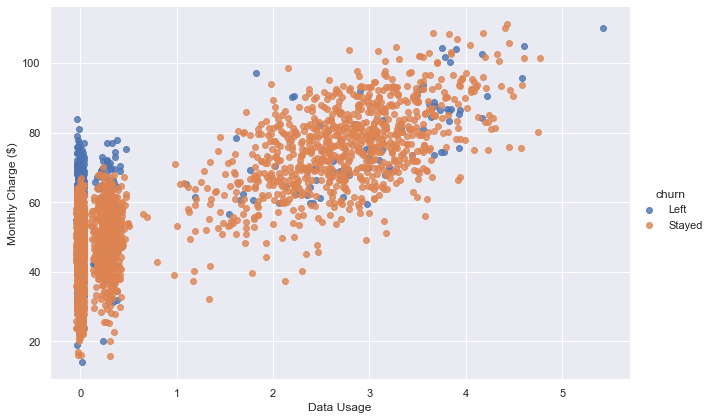

In [43]:
# Use color encodings to encode churn as the third variable

# Create scatterplot
g = sns.FacetGrid(data = customer_info, hue = 'churn', hue_order=['Left', 'Stayed'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'data_usage', 'monthly_charge', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Data Usage')
plt.ylabel('Monthly Charge ($)');

We could see that there is a positive correlation between data usage and monthly charge, and they both affect customer churn. We can also observe is that most customers with low to no data usage but received a high monthly charge left the company.

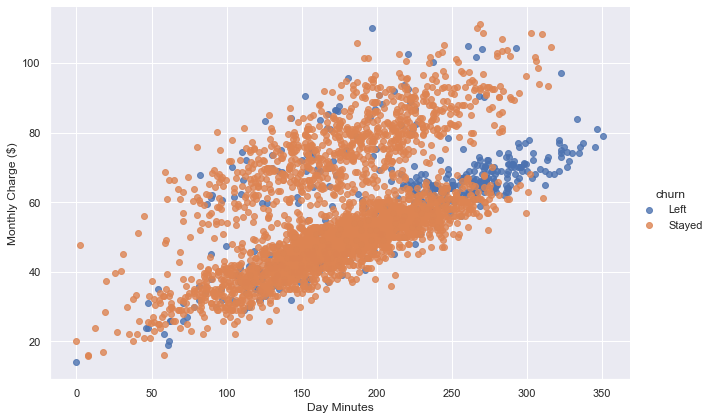

In [44]:
# Use color encodings to encode churn as the third variable

# create scatterplot
g = sns.FacetGrid(data = customer_info, hue = 'churn', hue_order=['Left', 'Stayed'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'day_minutes', 'monthly_charge', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Day Minutes');
plt.ylabel('Monthly Charge ($)');

From the scatter plot, it is clearly evident that there exists a correlation between day minutes and monthly charge. Looking at the upper right, you will see customers leaving the company. This is being caused by high monthly charges.

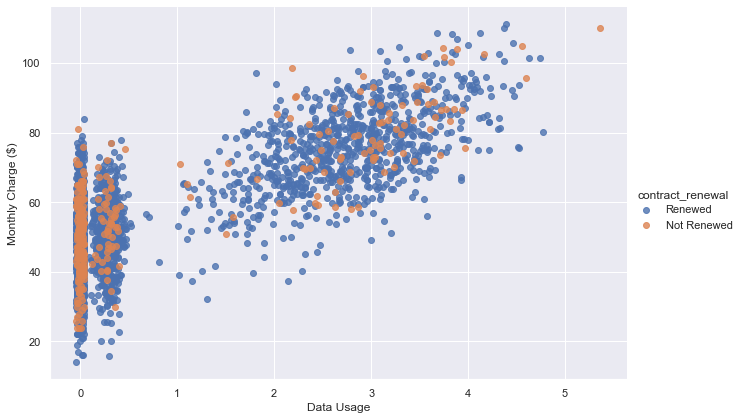

In [45]:
# Use color encodings to encode contract renewal as the third variable

# Create scatterplot
g = sns.FacetGrid(data = customer_info, hue = 'contract_renewal', hue_order=['Renewed', 'Not Renewed'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'data_usage', 'monthly_charge', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Data Usage');
plt.ylabel('Monthly Charge ($)');

We could see the increasing monthly charges where we have more data points. This shows us that most oof these customers weren't using any data but still recieved high monthly charge, which eventually resulted in most of them not renewing their contracts.

Then it's also clear that few of the customers who had data usage later started leaving the company. Both occurences are seen to be caused by increase in monthly charges.

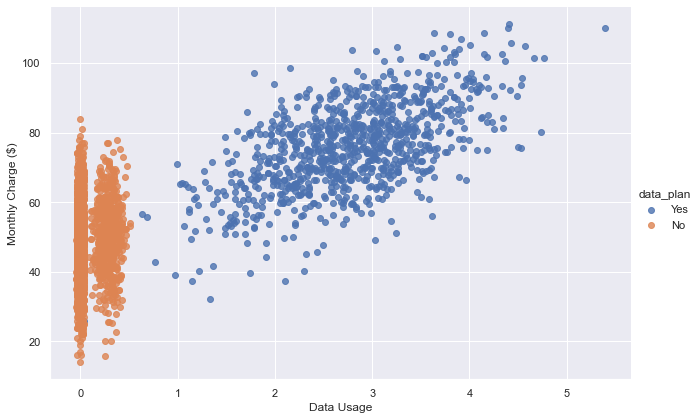

In [46]:
# Use color encodings to encode data plan as the third variable

# Create scatterplot
g = sns.FacetGrid(data = customer_info, hue = 'data_plan', hue_order=['Yes', 'No'], height=6, aspect=1.5)
g = g.map(sns.regplot, 'data_usage', 'monthly_charge', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Data Usage');
plt.ylabel('Monthly Charge ($)');

Here, it's clearly evident that the customers who do not use data, have no data plan but still get a high monthly charge.

In [47]:
# A function to create a bivariate barplot of two categorical variable and one numeric variable
def barplot(cat_var1, num_var, cat_var2):
    sns.barplot(data = customer_info, x = cat_var1, y = num_var, hue = cat_var2, errwidth = 0)
    plt.ylabel('{}'.format(num_var.replace('_', ' ').capitalize()));
    plt.xlabel('{}'.format(cat_var1.replace('_', ' ').capitalize()));

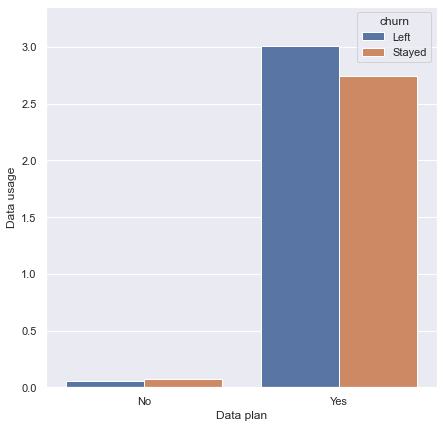

In [48]:
barplot('data_plan', 'data_usage', 'churn')

Here we see again that the number of customers who had a data plan and then used data was more. But we could also see a higher percentage of them who had data plan with more data usage leaving the company.

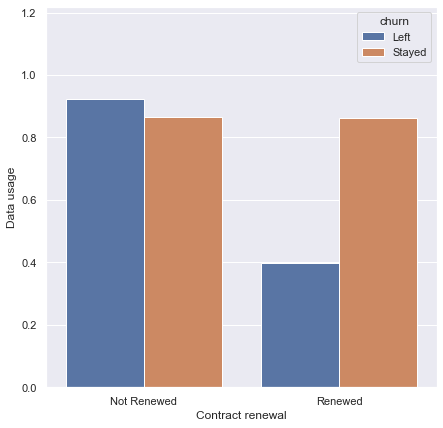

In [49]:
barplot('contract_renewal', 'data_usage', 'churn')

Now we see that more of the customers who had high data usage did not renew their contracts, and were eventually lost by the company. From the proof we have seeen from the data, the high data usage leading to high monthly charges.

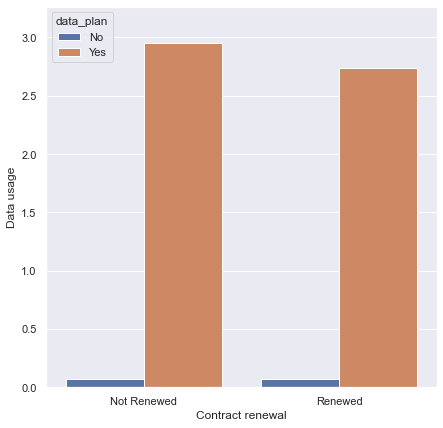

In [50]:
barplot('contract_renewal', 'data_usage', 'data_plan')

Here, we could see that the number of customers who had no data plan and no data usage are same when it comes to renewing or not renewing their contract.

But the number of customers who had data plan, with high data usage and eventually did not recently renew their contract are highrer that the people who had data plan with data usage and recently renew their contract.

It's safe to say that high data usage makes them not to renew their contract.

And we have seen many times what could have led to this which is high monthly charges.

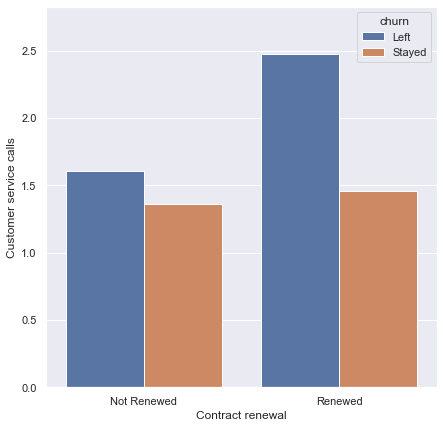

In [51]:
barplot('contract_renewal', 'customer_service_calls', 'churn')

We could see that the customers recently renewed thier contract but made made more than 2 calls to the customer service,  eventually left the company or cancelled the company's services.

Why did that happen? Mybe their issues not being resolved after the calls were made to made to the customer service or their issues weren't resolved within a small amount of time.

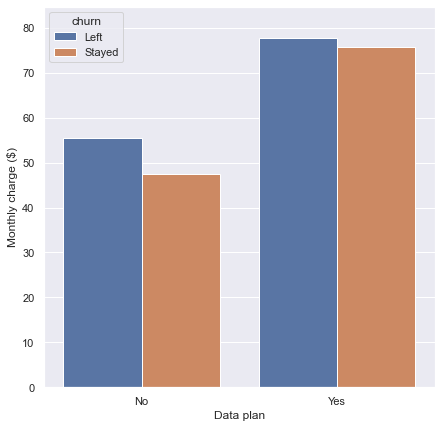

In [52]:
barplot('data_plan', 'monthly_charge', 'churn')
plt.ylabel('Monthly charge ($)');

Here, the bivariate barplot clearly shows that with the customers who had data plan, the number of customers who left the company due to high monthly charge were higher than the numbers who stayed.

Then in the customers who did not have data plan, the number of them who left the company due to high monthly charge were more than the customers who stayed.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There is a positive correlation between data usage and monthly charge. I also observed that most customers with low to no data usage but a high monthly charge left the company.

There is also a positive relationship between the average daytime minutes per month and the monthly charge. We saw that the customers who were charged high monthly due to high average daytime minutes left the company.

I also dicovered a relationship between data usage, monthly charge, and contract renewal. The sparsely scattered data points in the scatter plot, shoed most of the customers did not use data but were charged high monthly did not renew their contract. Even those who use data and are charged high monthly, later begins to decide not to renew their contracts.


### Were there any interesting or surprising interactions between features?
It was surprising to find out that the customers who have data plan with high data usage and stayed with the company later decided to quit the company's telecommunication services. And it has been observed that this was caused by high monthly charges.

## Conclusion

Customer churn in the telecommunication company was mostly affected by No data plan and also by high monthly charges.

When more customers have no data plan, it leads to them not using data from the company and will eventually make them not to renew their contracts. But, I found out that what's making them to have no data plan is high monthly charges. So the data plan isn't friendly, and I strongly suggest this should be looked into. Friendly data plans should be made available to the customers.

Customer churn is also affected by Customer service calls. We noticed that the customers who made more than two customer service calls didn't recently renew their contracts. It could be that their concerns wasn't addresses in those calls or maybe it took more time for their issues to be resolved. To conclude this, I will need more data like how much time each customer spent on those calls, and if their issue was resolved after making up two two calls or not.

BUt I strongly suggest that immediate improvement should be made in the quality of customer service that are being provided to the customers and the company should make sure that their issues are resolved within 1 to 2 calls.

In [53]:
# Saving the cleaned dataset to a csv file
customer_info.to_csv('customer_info.csv', index=False)